## **Importing necessary libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## **Loading Data**
**Merging 12 months of sales data files into a single file.**

In [4]:
files = [file for file in os.listdir('./data/raw/') ]


all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./data/raw/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [7]:
#Saving single file transformed
all_months_data.to_csv("./data/transformed/all_data.csv", index=False)

### **Data Processing**

In [ ]:
# Read data
all_data = pd.read_csv("./data/transformed/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### **Clean up the data** 

**Delete null value**

In [ ]:
# Do we have missing values?
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
# Check rows of NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop rows of NAN 
all_data = all_data.dropna(how='all')

In [8]:

all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

**Delete dulicate values**

In [9]:
# Do we have duplicates?
all_data.duplicated().sum()

np.int64(618)

In [10]:
# Drop dulicate values
all_data = all_data.drop_duplicates()

In [11]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185687 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185687 non-null  object
 1   Product           185687 non-null  object
 2   Quantity Ordered  185687 non-null  object
 3   Price Each        185687 non-null  object
 4   Order Date        185687 non-null  object
 5   Purchase Address  185687 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Change data types**

In [13]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [19]:
print(all_data['Quantity Ordered'].unique())

['2' '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']


In [20]:
# There are 1 row has wrong values. Need to filer it.
all_data = all_data[all_data['Quantity Ordered'] != 'Quantity Ordered']

In [21]:
print(all_data['Quantity Ordered'].unique())

['2' '1' '3' '5' '4' '7' '6' '8' '9']


In [22]:
all_data.shape

(185686, 6)

In [26]:
#Convert columns to the correct type

#to int
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)

#to float
all_data['Price Each'] = all_data['Price Each'].astype(float)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


**Convert Order Date datatype to datetime**

In [27]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


### **Feature Engineering**

**Add Total sales Column**

In [36]:
all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


**Add Month, Day and Hour column**

In [37]:
all_data['Month'] = all_data['Order Date'].dt.month_name()
all_data['Day Name'] = all_data['Order Date'].dt.day_name()
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day Name,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Friday,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Sunday,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Friday,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Friday,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Tuesday,9


**Splitting Purchase Address and get the cities names**

In [39]:
all_data[['Street Address', 'City', 'State ZIP']] = all_data['Purchase Address'].str.split(', ', expand=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day Name,Hour,Street Address,City,State ZIP
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Friday,8,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Sunday,22,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Friday,14,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Friday,14,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Tuesday,9,333 8th St,Los Angeles,CA 90001


In [43]:
# City column unique values
all_data['City'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin'], dtype=object)

In [40]:
all_data[['State' , 'Zip']] = all_data['State ZIP'].str.split(' ',expand = True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sales,Month,Day Name,Hour,Street Address,City,State ZIP,State,Zip
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,April,Friday,8,917 1st St,Dallas,TX 75001,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,April,Sunday,22,682 Chestnut St,Boston,MA 02215,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,April,Friday,14,669 Spruce St,Los Angeles,CA 90001,CA,90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,April,Friday,14,669 Spruce St,Los Angeles,CA 90001,CA,90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,April,Tuesday,9,333 8th St,Los Angeles,CA 90001,CA,90001


**Remove don't need columns: Purchase Address & State ZIP**

In [41]:
all_data.drop(['Purchase Address' , 'State ZIP'] , axis = 1 ,inplace = True)

In [42]:
all_data = all_data.sort_values(by='Order Date' )
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total Sales,Month,Day Name,Hour,Street Address,City,State,Zip
73891,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,11.99,January,Tuesday,3,9 Lake St,New York City,NY,10001
74701,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,11.95,January,Tuesday,3,760 Church St,San Francisco,CA,94016
76054,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,150.00,January,Tuesday,4,735 5th St,New York City,NY,10001
76708,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,2.99,January,Tuesday,5,75 Jackson St,Dallas,TX,75001
76061,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,23.90,January,Tuesday,6,943 2nd St,Atlanta,GA,30301


In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  int64  
 3   Price Each        185686 non-null  float64
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   Month             185686 non-null  int32  
 7   Sales             185686 non-null  float64
 8   City              185686 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 13.5+ MB


**Storage transformed data file**

In [44]:
#Saving transformed data
all_data.to_csv("./data/transformed/transformed_data.csv", index=False)

In [2]:
all_data = pd.read_csv("./data/transformed/transformed_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total Sales,Month,Day Name,Hour,Street Address,City,State,Zip
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,11.99,January,Tuesday,3,9 Lake St,New York City,NY,10001
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,11.95,January,Tuesday,3,760 Church St,San Francisco,CA,94016
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,150.00,January,Tuesday,4,735 5th St,New York City,NY,10001
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,2.99,January,Tuesday,5,75 Jackson St,Dallas,TX,75001
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,23.90,January,Tuesday,6,943 2nd St,Atlanta,GA,30301


## **EDA**

### **Sales Analysis**

#### Best month for sales?

In [3]:
monthly_sales  = all_data.groupby(['Month'] , as_index = False)['Total Sales'].sum()
monthly_sales

,Month,Total Sales
0,April,3389217.98
1,August,2241083.37
2,December,4608295.70
3,February,2200078.08
4,January,1821413.16
5,July,2646461.32
6,June,2576280.15
7,March,2804973.35
8,May,3150616.23
9,November,3197875.05


In [4]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
monthly_sales.sort_values('Month' , key = lambda x : x.apply(lambda y : month_dict[y]) , inplace = True)

In [5]:
# Set a beautiful style
sns.set_theme(style="whitegrid")

# Optional: Set a color palette
sns.set_palette("deep")  # Hoặc thử: "pastel" - Xanh nhạt, "viridis"- Tím, "Set2" - Xanh ngọc, "deep" - Xanh vừa, "muted", "coolwarm"

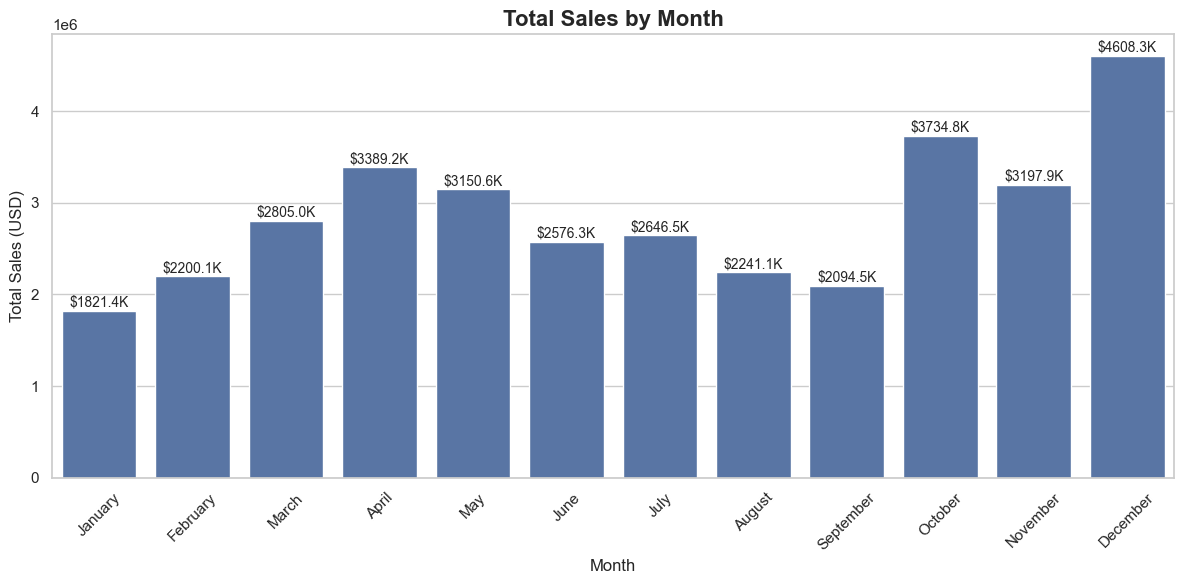

In [6]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='Total Sales')

# Add Subtitle and Lable
plt.title('Total Sales by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)

# Show values of column
for i, value in enumerate(monthly_sales['Total Sales']):
    plt.text(i, value + 10000, f'${value/1000:.1f}K', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusion
- **December is the highest sales in 2019 with approximately $4,600,000.**
- Revenue tends to increase from the beginning of the year to the end of the year: Especially in the last months of the year (October, November, December), revenue grows significantly. This can be due to factors such as shopping seasonality, year-end focused marketing campaigns, or special events.

#### What day of the week has the highest sales?

In [7]:
day_data = all_data.groupby(['Month' , 'Day Name'],as_index = False).agg({'Total Sales' : 'sum',
                                     'Order ID':'count'
                                     })
day_data

,Month,Day Name,Total Sales,Order ID
0,April,Friday,439725.28,2374
1,April,Monday,530733.53,2938
2,April,Saturday,434600.24,2462
3,April,Sunday,437671.13,2441
4,April,Thursday,483096.33,2501
...,...,...,...,...
79,September,Saturday,284888.09,1519
80,September,Sunday,326149.05,1948
81,September,Thursday,284028.91,1533
82,September,Tuesday,265511.68,1558


In [8]:
day_dict = {
    'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
    'Friday': 5, 'Saturday': 6, 'Sunday': 7
}

day_data['Month'] = pd.Categorical(day_data['Month'], categories=month_dict, ordered=True)
day_data['Day Name'] = pd.Categorical(day_data['Day Name'], categories=day_dict, ordered=True)

day_data.sort_values(by=['Month', 'Day Name'], inplace=True)

In [9]:
day_data_order = day_data.pivot_table(index = 'Month' , values = 'Order ID',columns='Day Name' )

C:\Users\Acer\AppData\Local\Temp\ipykernel_15316\1359739408.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_data_order = day_data.pivot_table(index = 'Month' , values = 'Order ID',columns='Day Name' )


<Axes: xlabel='Month', ylabel='Count of Orders'>

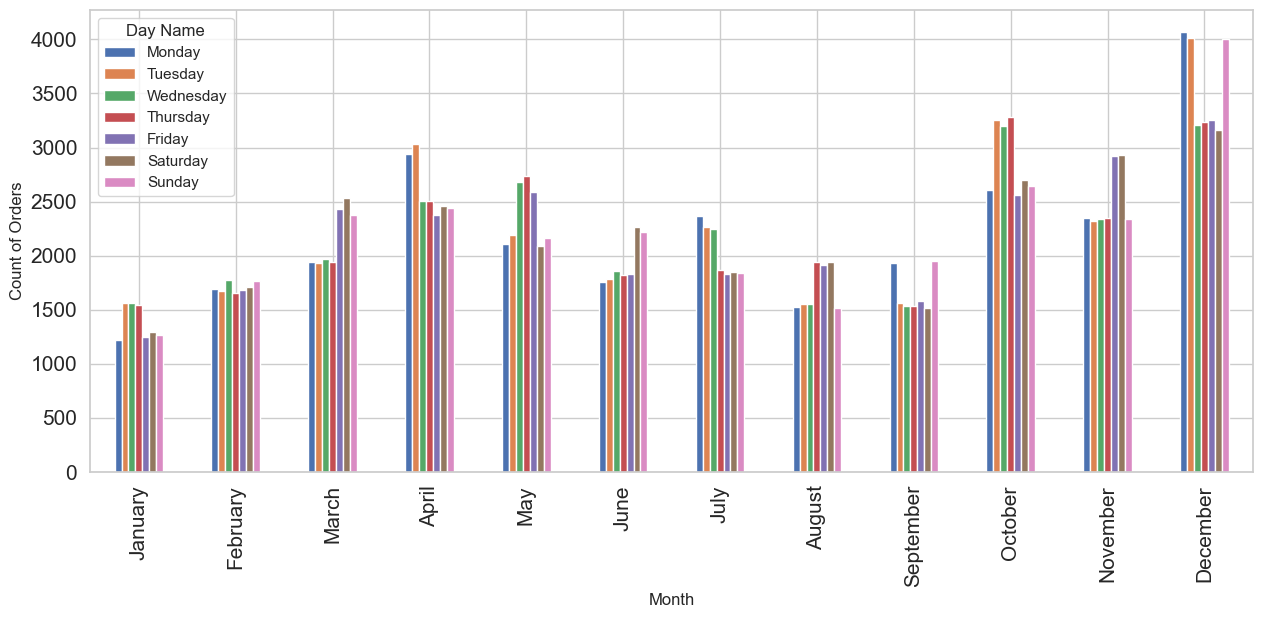

In [10]:
day_data_order.plot(kind = 'bar',figsize = (15 , 6) , fontsize = 15,ylabel = "Count of Orders")

#### Timline of day of the week VS Revenue ?

In [13]:
day_data_Total = day_data.pivot_table(index = 'Month' , values = 'Total Sales',columns='Day Name' )

C:\Users\Acer\AppData\Local\Temp\ipykernel_15316\2994390769.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_data_Total = day_data.pivot_table(index = 'Month' , values = 'Total Sales',columns='Day Name' )


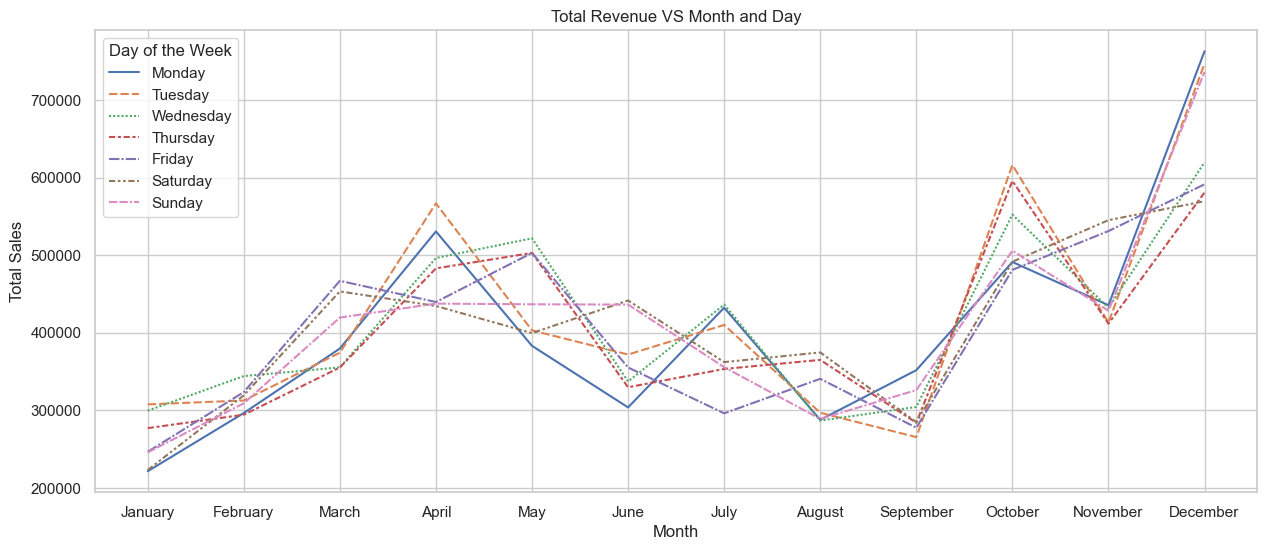

In [14]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=day_data_Total)
plt.title('Total Revenue VS Month and Day')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Day of the Week', loc='upper left')
plt.show()

#### Sales Per Hour?

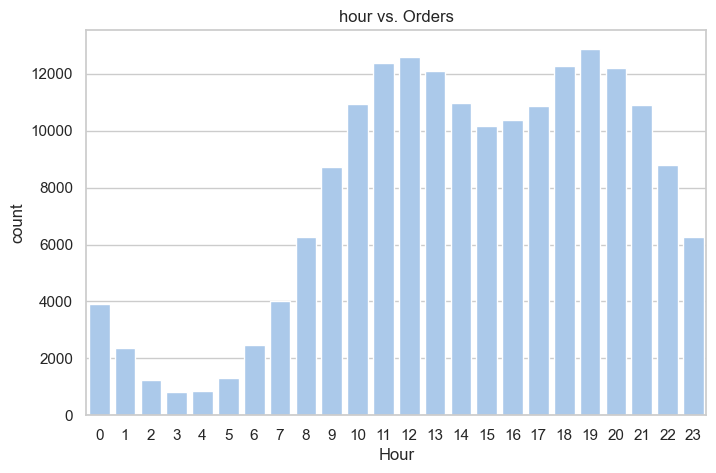

In [19]:
# Optional: Set a color palette
sns.set_palette("pastel")  # Hoặc thử: "pastel" - Xanh nhạt, "viridis"- Tím, "Set2" - Xanh ngọc, "deep" - Xanh vừa, "muted", "coolwarm"

plt.figure(figsize=(8,5))
plt.title('hour vs. Orders')
sns.countplot(x='Hour', data=all_data);

##### Conclusion
- The time frame sold the highest number of products is from **11 A.M to 1 P.M** and **6 P.M to 8 P.M**. (Over 12000)

### **Product Analysis**

#### What product sold the most?

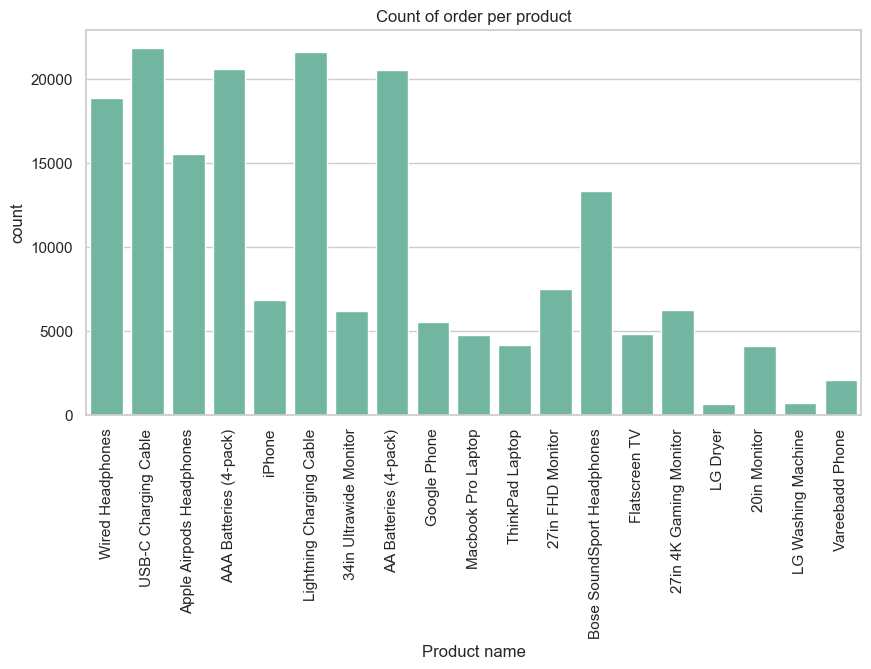

In [20]:
# Optional: Set a color palette
sns.set_palette("Set2")  # Hoặc thử: "pastel" - Xanh nhạt, "viridis"- Tím, "Set2" - Xanh ngọc, "deep" - Xanh vừa, "muted", "coolwarm"

plt.figure(figsize = (10,5))
sns.countplot(x = 'Product' , data = all_data)
plt.xticks(rotation=90)
plt.xlabel('Product name')
plt.title('Count of order per product')
plt.show()

In [53]:
product_prices  = all_data.groupby(['Product'] , as_index = False)['Price Each'].mean()
product_prices

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


C:\Users\Acer\AppData\Local\Temp\ipykernel_15316\636178063.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


<Figure size 1400x600 with 0 Axes>

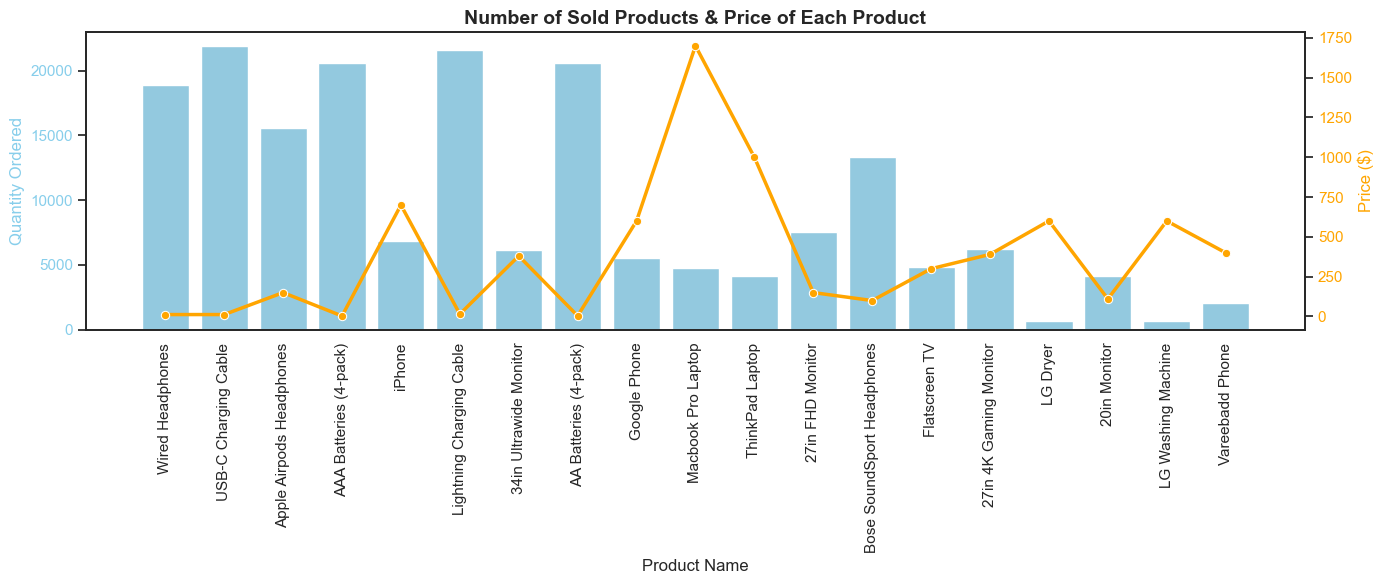

In [58]:
# Cấu hình đẹp cho biểu đồ
sns.set_theme(style="white")
plt.figure(figsize=(14, 6))

# Tạo trục chính
fig, ax1 = plt.subplots(figsize=(14, 6))

# Vẽ biểu đồ cột - số lượng sản phẩm đã bán
sns.countplot(data=all_data, x='Product', ax=ax1, color='skyblue')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Xoay nhãn x
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# Trục phụ (secondary y-axis)
ax2 = ax1.twinx()

# Vẽ đường biểu diễn giá sản phẩm
# Giả sử `product_prices` là DataFrame có 2 cột: 'Product' và 'Price'
sns.lineplot(data=product_prices, x='Product', y='Price Each', ax=ax2, color='orange', marker='o', linewidth=2.5)
ax2.set_ylabel('Price ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Thêm tiêu đề
plt.title('Number of Sold Products & Price of Each Product', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

##### Conclusion:
- **Best-selling products**: AA Batteries (4-pack) led in sales volume with 27,635 units, followed by AAA Batteries (4-pack) with 31,017 units. This shows a high demand for daily consumer products.
- **Best-selling phone accessories**: Charging cables (Lightning Charging Cable and USB-C Charging Cable) and headphones (Wired Headphones, Apple Airpods Headphones) are the best-selling phone accessories.
- **High-value products**: Macbook Pro Laptop and iPhone are the two products with the highest value, contributing significantly to revenue.
- **Popular computer monitors**: Computer monitors such as 27in FHD Monitor, 27in 4K Gaming Monitor and 34in Ultrawide Monitor all had quite high sales volume, showing a demand for computer peripherals.

#### Top Products for each City

In [22]:
cities_products = all_data.groupby(['City' , 'Product'] , as_index=False).agg({'Quantity Ordered' : 'sum' ,
                                            'Total Sales':'sum'
                                            })
cities_products.rename(columns = {'Quantity Ordered':'Orders Count'},inplace = True)
cities_products.head()

,City,Product,Orders Count,Total Sales
0,Atlanta,20in Monitor,341,37506.59
1,Atlanta,27in 4K Gaming Monitor,492,191875.08
2,Atlanta,27in FHD Monitor,587,88044.13
3,Atlanta,34in Ultrawide Monitor,482,183155.18
4,Atlanta,AA Batteries (4-pack),2193,8421.12


In [ ]:
# Function get top n number of sold products
def get_top_products(group):
    return group.nlargest(5, 'Orders Count')

cities_products = cities_products.groupby(['City'] , group_keys = False).apply(get_top_products)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15316\1794052747.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cities_products = cities_products.groupby(['City'] , group_keys = False).apply(get_top_products)


In [27]:
x = cities_products.pivot_table(index = 'City' , values ='Orders Count',columns = 'Product' )
x

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
City,,,,,
Atlanta,2193.0,2358.0,1874.0,1912.0,1576.0
Austin,1422.0,1668.0,1305.0,1249.0,1127.0
Boston,3011.0,3458.0,2482.0,2555.0,2222.0
Dallas,2260.0,2500.0,1862.0,1849.0,1664.0
Los Angeles,4434.0,4958.0,3765.0,3776.0,3266.0
New York City,3629.0,4119.0,3039.0,3263.0,2702.0
Portland,1939.0,2078.0,1528.0,1580.0,1360.0
San Francisco,6549.0,7404.0,5540.0,5883.0,4956.0
Seattle,2178.0,2443.0,1774.0,1864.0,1651.0


Text(0.5, 1.0, 'Top 5 Products for each City')

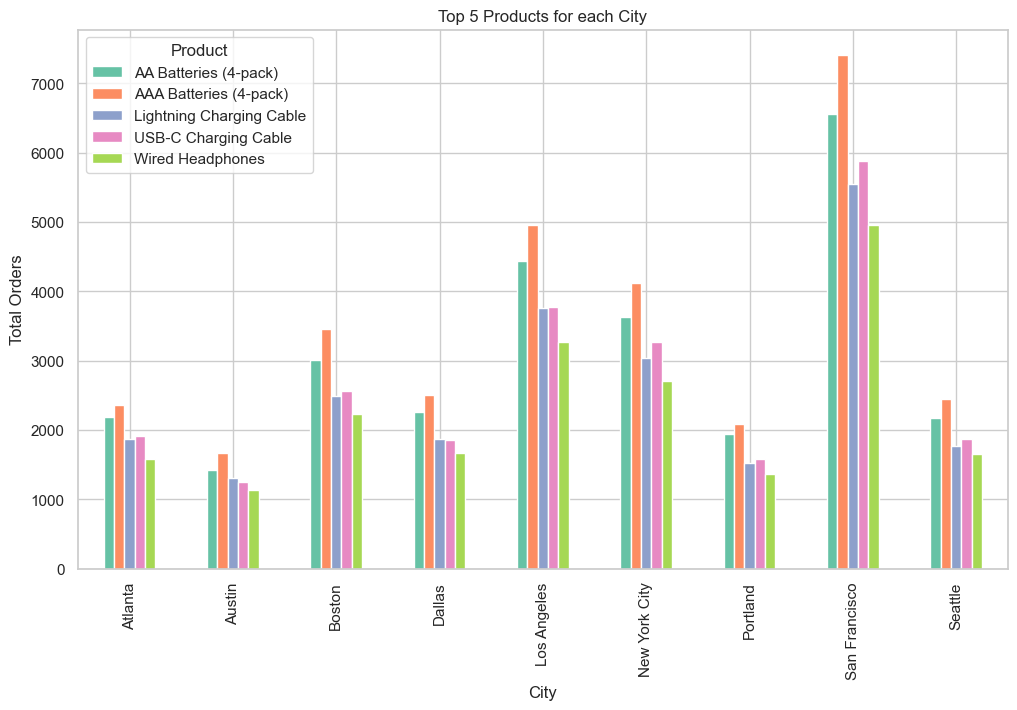

In [28]:
x.plot(kind = 'bar' , figsize=(12,7))
plt.ylabel('Total Orders')
plt.title("Top 5 Products for each City")

#### Top 5 Product With Highest Revenue for each City

In [29]:
# Function get top n products sales
def get_top_products_sales(group):
    return group.nlargest(5, 'Total Sales')

cities_products = cities_products.groupby(['City'] , group_keys = False).apply(get_top_products_sales)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15316\3086651675.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cities_products = cities_products.groupby(['City'] , group_keys = False).apply(get_top_products_sales)


In [30]:
x = cities_products.pivot_table(index = 'City' , values ='Total Sales',columns = 'Product' )
x

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
City,,,,,
Atlanta,8421.12,7050.42,28016.30,22848.40,18896.24
Austin,5460.48,4987.32,19509.75,14925.55,13512.73
Boston,11562.24,10339.42,37105.90,30532.25,26641.78
Dallas,8678.40,7475.00,27836.90,22095.55,19951.36
Los Angeles,17026.56,14824.42,56286.75,45123.20,39159.34
New York City,13935.36,12315.81,45433.05,38992.85,32396.98
Portland,7445.76,6213.22,22843.60,18881.00,16306.40
San Francisco,25148.16,22137.96,82823.00,70301.85,59422.44
Seattle,8363.52,7304.57,26521.30,22274.80,19795.49


Text(0.5, 1.0, 'Top 5 Products VS Revenue')

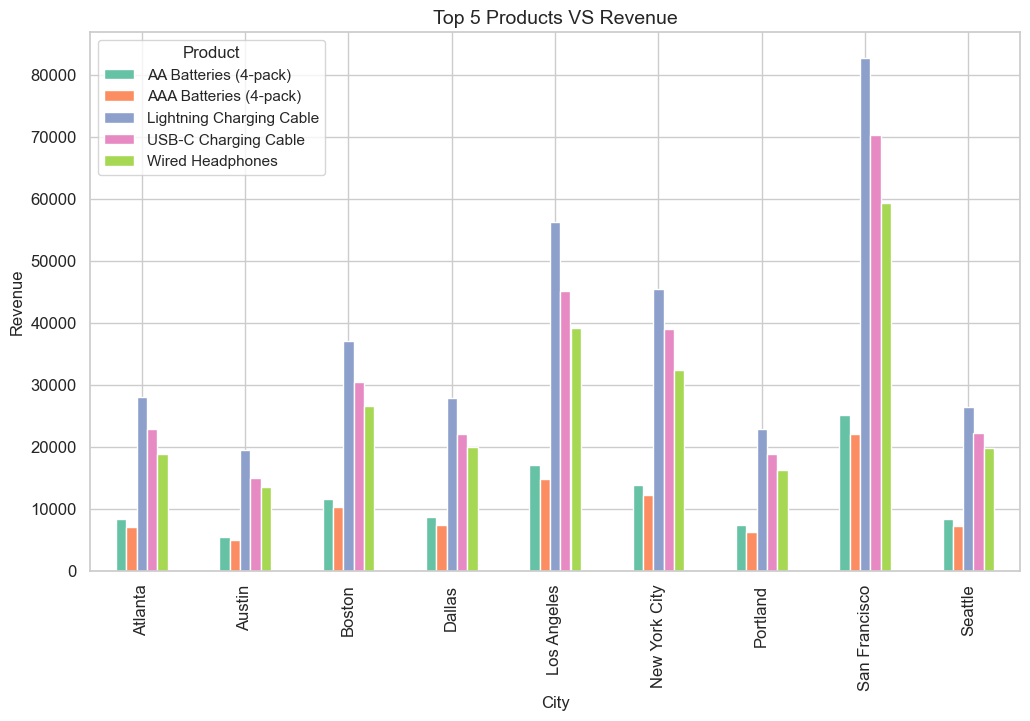

In [31]:
x.plot(kind = 'bar' , figsize=(12,7) , fontsize = 12)
plt.ylabel('Revenue')
plt.title("Top 5 Products VS Revenue" , fontsize = 14)

#### What products are most often sold together ?

In [67]:
# Nhóm các sản phẩm theo Order ID
grouped = all_data.groupby('Order ID')['Product'].apply(list)
grouped.head(10)

Order ID
141234                        [iPhone]
141235      [Lightning Charging Cable]
141236              [Wired Headphones]
141237              [27in FHD Monitor]
141238              [Wired Headphones]
141239        [AAA Batteries (4-pack)]
141240        [27in 4K Gaming Monitor]
141241          [USB-C Charging Cable]
141242    [Bose SoundSport Headphones]
141243      [Apple Airpods Headphones]
Name: Product, dtype: object

In [69]:
from itertools import combinations
from collections import Counter

# Khởi tạo counter để đếm các cặp sản phẩm
pair_counter = Counter()

# Tạo và đếm các cặp
for products in grouped:
    if len(products) >= 2:
        pairs = combinations(sorted(products), 2)
        pair_counter.update(pairs)

# Lấy ra top 10 cặp phổ biến nhất
most_common_pairs = pair_counter.most_common(10)

# Hiển thị kết quả
for pair, count in most_common_pairs:
    print(f"{pair}: {count}")

('Lightning Charging Cable', 'iPhone'): 1011
('Google Phone', 'USB-C Charging Cable'): 997
('Wired Headphones', 'iPhone'): 462
('Google Phone', 'Wired Headphones'): 422
('Apple Airpods Headphones', 'iPhone'): 373
('USB-C Charging Cable', 'Vareebadd Phone'): 368
('Bose SoundSport Headphones', 'Google Phone'): 228
('USB-C Charging Cable', 'Wired Headphones'): 203
('Vareebadd Phone', 'Wired Headphones'): 149
('Lightning Charging Cable', 'Wired Headphones'): 129


##### Conclusion
- **Trend of selling products together:** Customers often buy charging accessories together with their phones.

#### What percentage of orders include multiple products (more than one item) ?

In [70]:
products = all_data.groupby('Order ID')['Product'].count()
products = products.value_counts()
products = products.nlargest(3)
products

Product
1    171558
2      6526
3       337
Name: count, dtype: int64

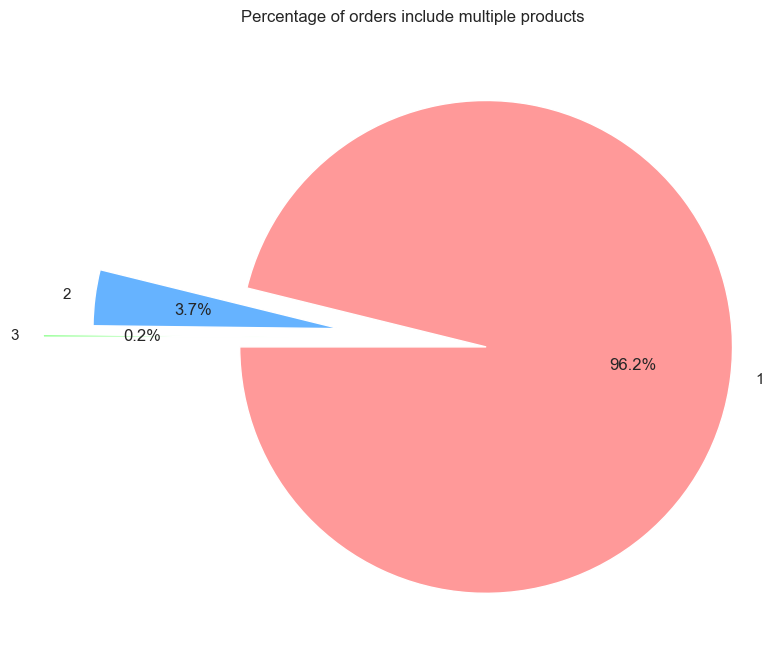

In [72]:
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = [0.3,0.3,0.5]
plt.figure(figsize=(8, 8))
plt.pie(products, labels=products.index, colors=colors, autopct='%1.1f%%', startangle=180,explode = explode)
plt.title("Percentage of orders include multiple products")

plt.show()

#### What was the highest single-order value?

In [73]:
all_data[all_data['Total Sales'] == max(all_data['Total Sales'])]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total Sales,Month,Day Name,Hour,Street Address,City,State,Zip
49847,49847,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,3400.0,April,Monday,12,731 11th St,New York City,NY,10001
53111,53111,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,3400.0,April,Saturday,21,668 Park St,San Francisco,CA,94016
61612,61612,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,3400.0,May,Monday,13,643 4th St,Boston,MA,2215
74772,74772,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,3400.0,June,Saturday,9,953 Ridge St,San Francisco,CA,94016


### **City and Revenue Analysis**

#### What city with Highest Revenue ?

In [74]:
cities_orders = all_data.groupby(['City'] , as_index=False).agg({'Order ID' : 'count' ,
                                            'Total Sales':'sum'
                                            })
cities_orders.rename(columns = {'Order ID':'Orders Count'},inplace = True)
cities_orders

,City,Orders Count,Total Sales
0,Atlanta,14863,2794199.07
1,Austin,9890,1818044.33
2,Boston,19901,3658627.65
3,Dallas,14797,2765373.96
4,Los Angeles,29564,5448304.28
5,New York City,24847,4661867.14
6,Portland,12449,2319331.94
7,San Francisco,44662,8254743.55
8,Seattle,14713,2745046.02


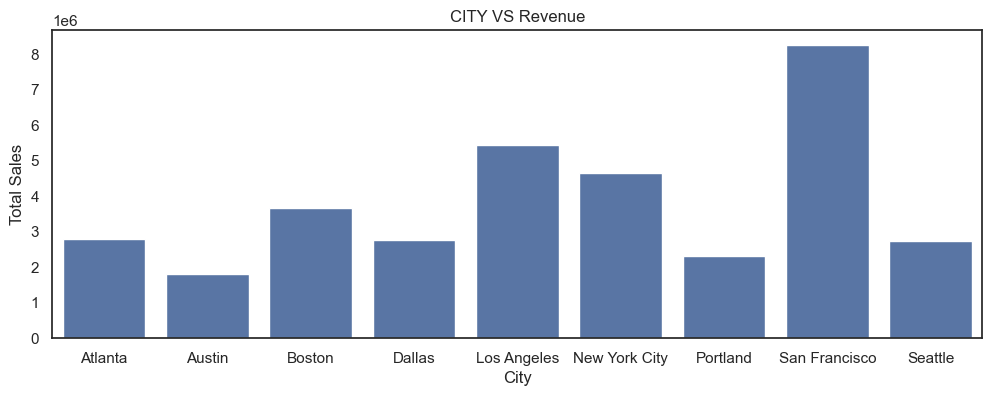

In [ ]:
plt.figure(figsize=(12 , 4))
ax = sns.barplot(data = cities_orders, x = 'City' , y = 'Total Sales')
plt.title("CITY VS Revenue")
plt.show()

#### What city sold the most products ?

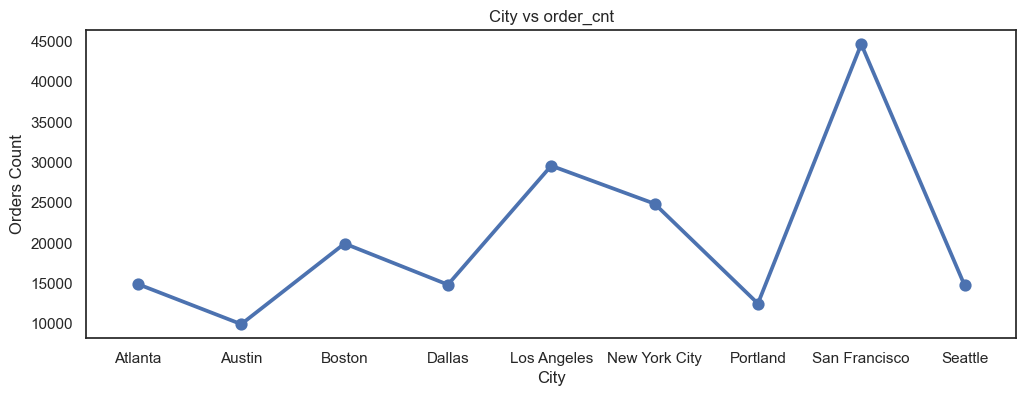

In [77]:
plt.figure(figsize=(12 , 4))
ax = sns.pointplot(data = cities_orders, x = 'City' , y = 'Orders Count')
plt.title("City vs order_cnt")
plt.show()

##### Conclusion
- Highest Revenue: San Francisco leads in revenue, followed by New York City and Los Angeles. This shows that the Western US market, especially the large cities, has great business potential.
- Significant differences between cities: Revenue between cities varies greatly, from a few hundred thousand to more than 8 million. This shows that the business potential and market size of each city are different.
- Concentration in large cities: Large cities such as New York, Los Angeles and San Francisco contribute a large part of the total revenue. This shows the importance of large urban markets.

### **State Analysis**

#### What is the distribution of States?

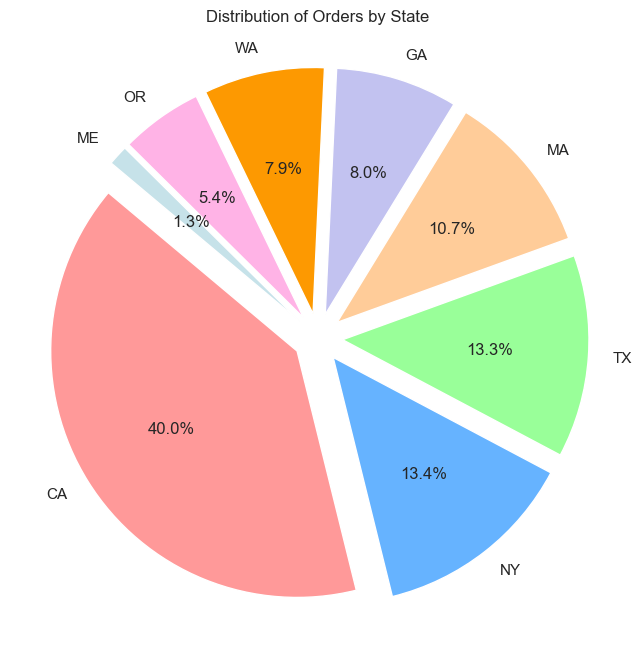

In [78]:
states = all_data['State'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#fd9901', '#ffb3e6', '#c6e2e9']
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(8, 8))
plt.pie(states, labels=states.index, colors=colors, autopct='%1.1f%%', startangle=140,explode = explode)
plt.title("Distribution of Orders by State")

plt.show()